Adding two Gaussians
======================

--------------------- Parameter summary ------------------------
      A_GF(1) =            0, free: F, restricted: F, related: F
     mu_GF(1) =            0, free: F, restricted: F, related: F
    sig_GF(1) =            0, free: F, restricted: F, related: F
    off_GF(1) =            0, free: F, restricted: F, related: F
    lin_GF(1) =            0, free: F, restricted: F, related: F
      A_GF(2) =            0, free: F, restricted: F, related: F
     mu_GF(2) =            0, free: F, restricted: F, related: F
    sig_GF(2) =            0, free: F, restricted: F, related: F
    off_GF(2) =            0, free: F, restricted: F, related: F
    lin_GF(2) =            0, free: F, restricted: F, related: F
----------------------------------------------------------------
--------------------- Parameter summary ------------------------
      A_GF(1) =      1.02055, free: T, restricted: F, related: F
     mu_GF(1) =    0.0202002, free: T, restricted: F, related: F
    sig_GF(1) =      1.01

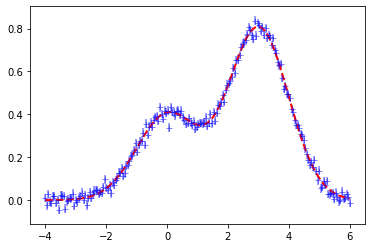

In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pylab as plt
# ... and now the funcFit package
from PyAstronomy import funcFit2 as fuf2
import scipy.optimize as sco

np.random.seed(1234)

# Instantiate Gaussian model objects
gf1 = fuf2.GaussFit()
gf2 = fuf2.GaussFit()
# Sum the models (refers to their 'evaluate' methods)
# Any of +-*/ and ** can be used
gf = gf1 + gf2

gf.parameterSummary()

gf["A_GF(1)"] = 1
gf["A_GF(2)"] = 2
gf["mu_GF(1)"] = 0.0
gf["mu_GF(2)"] = 3.0
gf["sig_GF(1)"] = 1.0
gf["sig_GF(2)"] = 1.0

# Evaluate model and add noise
x = np.linspace(-4., 6., 200)
y = gf.evaluate(x) + np.random.normal(0, 0.02, len(x))

# Re-fit model
# Use filename-like pattern matching to thaw parameters
gf.thaw(["A_*", "sig_*", "mu_*"])
fuf2.fitfmin_l_bfgs_b(gf, x, y, yerr=0.02)

gf.parameterSummary()

plt.errorbar(x, y, yerr=0.02, fmt="b+", alpha=0.5)
plt.plot(x, gf.evaluate(x), 'r--', lw=2)
plt.show()